# Homework 4:  Linear models

This homework assignment is designed to give you practice with linear models and the bias-variance tradeoff. 

You will need to download the **unrestricted_trimmed_1_7_2020_10_50_44.csv** file from the *Homework/hcp_data* folder in the class GitHub repository. 


This data is a portion of the [Human Connectome Project database](http://www.humanconnectomeproject.org/). It provides measures of cognitive tasks and brain morphology measuresments from 1206 participants. The full description of each variable is provided in the **HCP_S1200_DataDictionary_April_20_2018.csv** file in the *Homework/hcp_data* folder in the class GitHub repository.

---
## 1. Loading the Data (1 point)

Use the `setwd` and `read.csv` functions to load data from the **unrestricted_trimmed_1_7_2020_10_50_44.csv** file. 

Using the tidyverse tools, make a new dataframe `d1` that only inclues the subject ID (`Subject`), gender (`Gender`), Flanker Task performance (`Flanker_Unadj`), total white matter volume (`FS_Tot_WM_Vol`), and total grey matter volume (`FS_Total_GM_Vol`) variables and remove all _na_ values.

Use the `head` function to look at the first few rows of each data frame. 

In [6]:
#INSERT CODE HERE

library("tidyverse")
library("dplyr")

setwd("/Users/jermondrake/Desktop/DataSciencePsychNeuro/Homeworks/hcp_data")
Human_Connectome <- read.csv("/Users/jermondrake/Desktop/DataSciencePsychNeuro/Homeworks/hcp_data/unrestricted_trimmed_1_7_2020_10_50_44.csv")
head(Human_Connectome)

(d1 <- Human_Connectome[, c("Subject", "Gender", "Flanker_Unadj","FS_Tot_WM_Vol","FS_Total_GM_Vol")])
na.omit(d1) -> d1
head(d1)

,Subject,Release,Acquisition,Gender,Age,MMSE_Score,PSQI_Score,PSQI_Comp1,PSQI_Comp2,PSQI_Comp3,⋯,Noise_Comp,Odor_Unadj,Odor_AgeAdj,PainIntens_RawScore,PainInterf_Tscore,Taste_Unadj,Taste_AgeAdj,Mars_Log_Score,Mars_Errs,Mars_Final
,<int>,<fct>,<fct>,<fct>,<fct>,<int>,<int>,<int>,<int>,<int>,⋯,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
1,100004,S900,Q06,M,22-25,29,8,1,2,2,⋯,5.2,101.12,86.45,2,45.9,107.17,105.31,1.80,0,1.80
2,100206,S900,Q11,M,26-30,30,6,1,1,1,⋯,6.0,108.79,97.19,1,49.7,72.63,72.03,1.84,0,1.84
3,100307,Q1,Q01,F,26-30,29,4,1,0,1,⋯,3.6,101.12,86.45,0,38.6,71.69,71.76,1.76,0,1.76
4,100408,Q3,Q03,M,31-35,30,4,1,1,0,⋯,2.0,108.79,98.04,2,52.6,114.01,113.59,1.76,2,1.68
5,100610,S900,Q08,M,26-30,30,4,1,1,0,⋯,2.0,122.25,110.45,0,38.6,84.84,85.31,1.92,1,1.88
6,101006,S500,Q06,F,31-35,28,2,1,1,0,⋯,6.0,122.25,111.41,0,38.6,123.80,123.31,1.80,0,1.80


Subject,Gender,Flanker_Unadj,FS_Tot_WM_Vol,FS_Total_GM_Vol
<int>,<fct>,<dbl>,<int>,<int>
100004,M,121.97,NA,NA
100206,M,130.42,543134,807245
100307,F,112.56,407292,664124
100408,M,121.18,500417,726206
100610,M,126.53,512946,762308
101006,F,101.85,429449,579632
101107,M,107.04,416995,665024
101208,F,94.96,NA,NA
101309,M,113.67,491221,707674


,Subject,Gender,Flanker_Unadj,FS_Tot_WM_Vol,FS_Total_GM_Vol
,<int>,<fct>,<dbl>,<int>,<int>
2,100206,M,130.42,543134,807245
3,100307,F,112.56,407292,664124
4,100408,M,121.18,500417,726206
5,100610,M,126.53,512946,762308
6,101006,F,101.85,429449,579632
7,101107,M,107.04,416995,665024


---
## 2. Initial data visualization (2 point)

Use the `pairs` function to look at all the pairwise scatterplots of the variables in `d1`. Describe which variables seem positively correlated, negatively correlated, or not correlated at all.

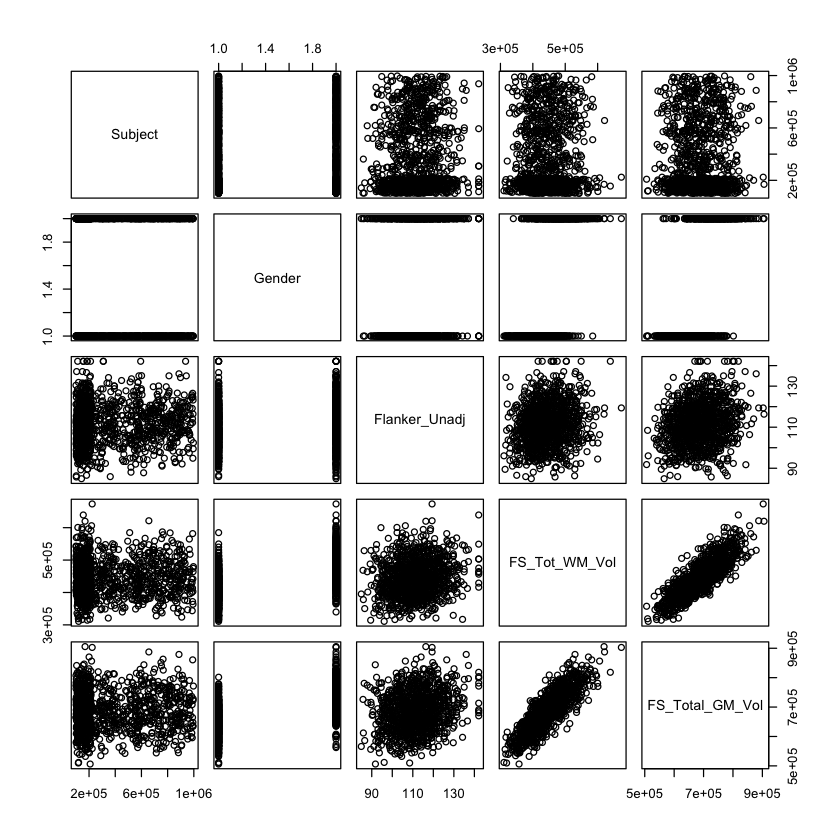

In [7]:
#INSERT CODE HERE

pairs(d1)


There are positive correlations between the following measures:1) total white matter volume and gray matter, 2) total gray matter volume and flanker task performance 3) total white matter volume and flanker task performance


Typically I don't look at correlations with subject ID variables, however, there does not appear to be a correlation between the following variables at all: 1) subject ID and total gray matter, 2) subject ID and flanker performance, 3) subject ID and total white matter volume

Similar to the subject ID, interpreting correlations between gender and other variables doesn't seem that intuitive since arbitrary coding can influence the interpreation, but how it is presented in the pairs function, there appears to be no correlation between gender and flanker task performance. However, it appears there may be positive correlations between 1) gender and total white matter volume,  and 2) gender and total gray matter volume

---
## 3. Linear regression (4 points)

Use the `lm` (linear model) function to determine the association between Flanker Task performance and total grey matter volume from the `d1` data frame.

$$
Y_{flanker} = \beta_0 + \beta_1 X_{GM volume}
$$

Show the results using the `summary` function, and report the mean coefficient values for $beta_0$ \& $\beta_1$ (`coef` function) and their 95\% confidence intervals (`confint` function). Is grey matter volume significantly associated with Flanker Task performance?

In [10]:
#INSERT CODE HERE
lm.fit = lm(Flanker_Unadj~FS_Total_GM_Vol, data=d1)
summary(lm.fit) 
coefficients(lm.fit) # Creates a new variable containing the standard error of the linear prediction
confint(lm.fit,level=0.95) # for obtaining confidence intervals



Call:
lm(formula = Flanker_Unadj ~ FS_Total_GM_Vol, data = d1)

Residuals:
     Min       1Q   Median       3Q      Max 
-28.2280  -6.5969  -0.0119   6.5497  31.0108 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)     9.026e+01  3.041e+00  29.677  < 2e-16 ***
FS_Total_GM_Vol 3.110e-05  4.412e-06   7.048 3.18e-12 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 9.864 on 1111 degrees of freedom
Multiple R-squared:  0.0428,	Adjusted R-squared:  0.04194 
F-statistic: 49.68 on 1 and 1111 DF,  p-value: 3.177e-12


(Intercept) FS_Total_GM_Vol 
   9.025646e+01    3.109965e-05

,2.5 %,97.5 %
(Intercept),8.428917e+01,9.622375e+01
FS_Total_GM_Vol,2.244198e-05,3.975733e-05


 Gray matter is significantly associated with Flanker Task performance.

---
## 4. Plotting (2 points)

Use `ggplot` to plot the `FS_Total_GM_Vol` variable (x axis) against the `Flanker_Unadj` variable (y axis), as well as the regression line with confidence intervals on the regrssion line. Qualitatively describe what you see. 

`geom_smooth()` using formula 'y ~ x'



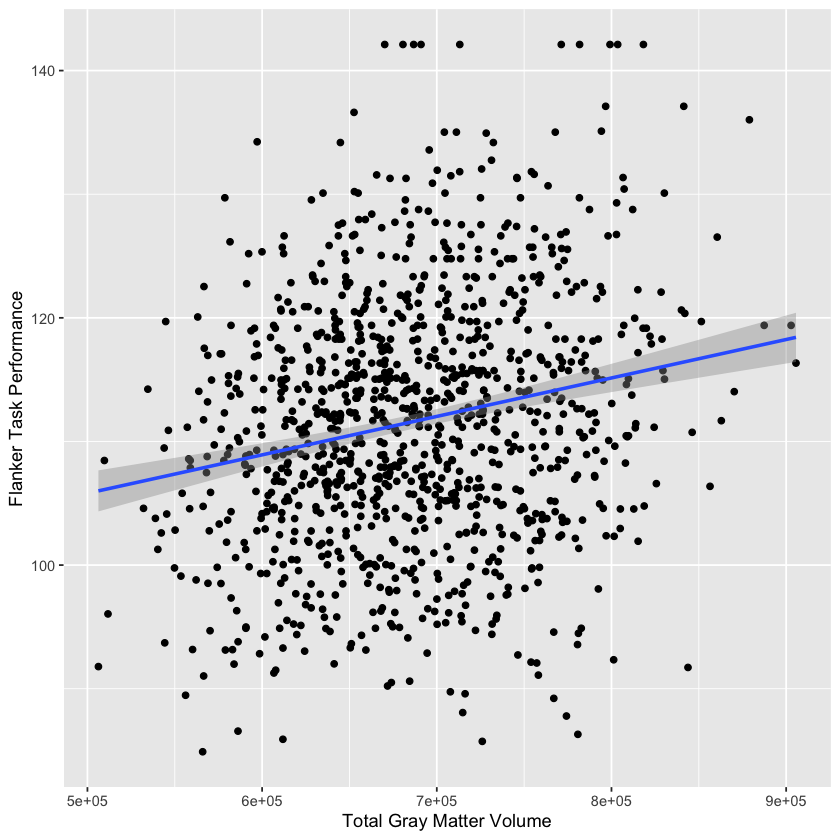

In [9]:
#INSERT CODE HERE
ggplot(d1, aes(x=FS_Total_GM_Vol, y=Flanker_Unadj)) +
  geom_point() +
  geom_smooth(method=lm, se=TRUE) +
  scale_x_continuous(name = "Total Gray Matter Volume" ) +
  scale_y_continuous(name = "Flanker Task Performance")


 There appears to be a positive association between total gray matter volume and flanker task performance. Greater total gray matter volume is associated with better performance on the flanker task.


---

## 5. Reflection (1 point)


> Based on the analyses above, we can conclude that there is a signficant, positive association between total gray matter volume and flanker task performance such that greater total gray matter volume is associated with better performance on the flanker task. Additionally, although this relationship is significant, total gray matter volume only accounts for approxiametely 4% of the variance in flanker task performance. This suggests that there is quite a bit of reducible error that we may be able to address by considering other variables in our model as covariates going forward (i.e. age, gender?) 

**DUE:** 5pm EST, March 4, 2022

**IMPORTANT** Did you collaborate with anyone on this assignment? If so, list their names here. 
> *Someone's Name*